# Restaurant Revenue Data Analysys
## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Loading the Dataset

In [2]:
dataset=pd.read_csv('cleaned_restaurant_data.csv')

In [3]:
dataset

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224.0,23406.0,13,185,161.924906,1.3,7.0,Yes,13,4,6.389455e+05
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416.0,42741.0,8,533,148.759717,2.6,3.4,Yes,48,6,4.902078e+05
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796.0,37285.0,18,853,56.849189,5.3,6.7,No,27,14,5.413686e+05
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167.0,15214.0,13,82,205.433265,4.6,2.8,Yes,9,17,4.045568e+05
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639.0,40171.0,9,78,241.681584,8.6,2.1,No,37,26,1.350758e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102.0,11298.0,11,380,253.919515,9.5,5.0,Yes,37,0,4.346535e+05
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988.0,20432.0,9,713,175.590195,2.7,2.6,No,37,21,4.149779e+05
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949.0,63945.0,6,436,222.953647,4.8,1.7,Yes,83,21,9.303959e+05
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707.0,7170.0,1,729,178.482851,6.1,2.1,No,6,21,3.114935e+05


## Check null value

In [4]:
dataset.isna().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

## Categorizing Numerical and Categorical Columns

In [5]:
def quanqual(dataset):
    quan = []
    qual = []
    for ColumnName in dataset.columns:
        if dataset[ColumnName].dtype == 'O':  
            qual.append(ColumnName)
        else:
            quan.append(ColumnName) 
    return quan,qual

In [6]:
quan, qual=quanqual(dataset)

In [7]:
# Assuming 'quan' is defined somewhere in your code
descriptive = pd.DataFrame(index=['mean','median','mode','Q1:25%','Q2:50%','Q3:75%','Q4:100%','IQR','1.5rule','lesser','greater','min','max'], columns=quan)

# Assuming 'dataset' is your DataFrame
for ColumnName in quan:
    descriptive.loc['mean', ColumnName] = dataset[ColumnName].mean()
    descriptive.loc['median', ColumnName] = dataset[ColumnName].median()
    descriptive.loc['mode', ColumnName] = dataset[ColumnName].mode()[0]
    descriptive.loc['Q1:25%', ColumnName] = dataset[ColumnName].quantile(0.25)
    descriptive.loc['Q2:50%', ColumnName] = dataset[ColumnName].quantile(0.50)
    descriptive.loc['Q3:75%', ColumnName] = dataset[ColumnName].quantile(0.75)
    descriptive.loc['99%', ColumnName] = np.percentile(dataset[ColumnName], 99)
    descriptive.loc['Q4:100%', ColumnName] = dataset[ColumnName].max()
    descriptive.loc['IQR', ColumnName] = descriptive.loc['Q3:75%', ColumnName] - descriptive.loc['Q1:25%', ColumnName]
    descriptive.loc['1.5rule', ColumnName] = 1.5 * descriptive.loc['IQR', ColumnName]
    descriptive.loc['lesser', ColumnName] = descriptive.loc['Q1:25%', ColumnName] - descriptive.loc['1.5rule', ColumnName]
    descriptive.loc['greater', ColumnName] = descriptive.loc['Q3:75%', ColumnName] + descriptive.loc['1.5rule', ColumnName]
    descriptive.loc['min', ColumnName] = dataset[ColumnName].min()
    descriptive.loc['max', ColumnName] = dataset[ColumnName].max()

descriptive

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
mean,4.008258,60.212835,47.896659,3173.190936,35770.578857,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,655314.472997
median,4.0,60.0,45.535,2846.5,32518.5,10.0,528.0,173.910079,5.5,5.6,27.0,26.0,604242.085
mode,3.9,50,31.11,7187.75,77526.875,18,981,50.011717,5.9,1.6,10,16,1350758.47875
Q1:25%,3.5,45.0,35.49,1889.0,22592.5,5.0,277.0,113.311102,3.3,3.2,13.0,13.0,454651.3975
Q2:50%,4.0,60.0,45.535,2846.5,32518.5,10.0,528.0,173.910079,5.5,5.6,27.0,26.0,604242.085
Q3:75%,4.5,75.0,60.3,4008.5,44566.25,15.0,764.25,237.406885,7.8,7.8,43.0,43.0,813094.23
Q4:100%,5.0,90,76.0,7187.75,77526.875,19,999,299.984924,10.0,10.0,88,88,1350758.47875
IQR,1.0,30.0,24.81,2119.5,21973.75,10.0,487.25,124.095783,4.5,4.6,30.0,30.0,358442.8325
1.5rule,1.5,45.0,37.215,3179.25,32960.625,15.0,730.875,186.143674,6.75,6.9,45.0,45.0,537664.24875
lesser,2.0,0.0,-1.725,-1290.25,-10368.125,-10.0,-453.875,-72.832572,-3.45,-3.7,-32.0,-32.0,-83012.85125


## Check Outliers 

In [8]:
lesser=[]
greater=[]

for columnName in quan:
    if(descriptive[columnName]["min"]<descriptive[columnName]["lesser"]):
        lesser.append(columnName)
    if(descriptive[columnName] ["max"]>descriptive[columnName]["greater"]):
        greater.append(columnName)

In [9]:
greater

[]

In [10]:
lesser

[]

## Statistical Summary

In [11]:
def Univariate(dataset,quan):
    descriptive = pd.DataFrame(index=['mean','median','mode','Q1:25%','Q2:50%','Q3:75%','Q4:100%','IQR','1.5rule',
                                      'lesser','greater','min','max','skew','kurtosis'], columns=quan)

    for ColumnName in quan:
        descriptive.loc['mean', ColumnName] = dataset[ColumnName].mean()
        descriptive.loc['median', ColumnName] = dataset[ColumnName].median()
        descriptive.loc['mode', ColumnName] = dataset[ColumnName].mode()[0]
        descriptive.loc['Q1:25%', ColumnName] = dataset[ColumnName].quantile(0.25)
        descriptive.loc['Q2:50%', ColumnName] = dataset[ColumnName].quantile(0.50)
        descriptive.loc['Q3:75%', ColumnName] = dataset[ColumnName].quantile(0.75)
        descriptive.loc['99%', ColumnName] = np.percentile(dataset[ColumnName], 99)
        descriptive.loc['Q4:100%', ColumnName] = dataset[ColumnName].max()
        descriptive.loc['IQR', ColumnName] = descriptive.loc['Q3:75%', ColumnName] - descriptive.loc['Q1:25%', ColumnName]
        descriptive.loc['1.5rule', ColumnName] = 1.5 * descriptive.loc['IQR', ColumnName]
        descriptive.loc['lesser', ColumnName] = descriptive.loc['Q1:25%', ColumnName] - descriptive.loc['1.5rule', ColumnName]
        descriptive.loc['greater', ColumnName] = descriptive.loc['Q3:75%', ColumnName] + descriptive.loc['1.5rule', ColumnName]
        descriptive.loc['min', ColumnName] = dataset[ColumnName].min()
        descriptive.loc['max', ColumnName] = dataset[ColumnName].max()
        descriptive.loc['skew', ColumnName]=dataset[ColumnName].skew()
        descriptive.loc['kurtosis', ColumnName]=dataset[ColumnName].kurtosis()
        descriptive.loc['var', ColumnName]=dataset[ColumnName].var()
        descriptive.loc['std', ColumnName]=dataset[ColumnName].std()

    return descriptive

In [12]:
descriptive

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
mean,4.008258,60.212835,47.896659,3173.190936,35770.578857,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,655314.472997
median,4.0,60.0,45.535,2846.5,32518.5,10.0,528.0,173.910079,5.5,5.6,27.0,26.0,604242.085
mode,3.9,50,31.11,7187.75,77526.875,18,981,50.011717,5.9,1.6,10,16,1350758.47875
Q1:25%,3.5,45.0,35.49,1889.0,22592.5,5.0,277.0,113.311102,3.3,3.2,13.0,13.0,454651.3975
Q2:50%,4.0,60.0,45.535,2846.5,32518.5,10.0,528.0,173.910079,5.5,5.6,27.0,26.0,604242.085
Q3:75%,4.5,75.0,60.3,4008.5,44566.25,15.0,764.25,237.406885,7.8,7.8,43.0,43.0,813094.23
Q4:100%,5.0,90,76.0,7187.75,77526.875,19,999,299.984924,10.0,10.0,88,88,1350758.47875
IQR,1.0,30.0,24.81,2119.5,21973.75,10.0,487.25,124.095783,4.5,4.6,30.0,30.0,358442.8325
1.5rule,1.5,45.0,37.215,3179.25,32960.625,15.0,730.875,186.143674,6.75,6.9,45.0,45.0,537664.24875
lesser,2.0,0.0,-1.725,-1290.25,-10368.125,-10.0,-453.875,-72.832572,-3.45,-3.7,-32.0,-32.0,-83012.85125


## Frequency

In [13]:
def freqTable(columnName,dataset):
    freqTable=pd.DataFrame(columns=['unique_values','frequency','Relative frequency','cusum'])
    freqTable['unique_values']=dataset[columnName].value_counts().index
    freqTable['frequency']=dataset[columnName].value_counts().values
    freqTable['Relative frequency']=(freqTable['frequency']/103)
    freqTable['cusum']=freqTable['Relative frequency'].cumsum()
    return freqTable

In [14]:
freqTable('Rating',dataset)

,unique_values,frequency,Relative frequency,cusum
0,3.9,448,4.349515,4.349515
1,4.8,438,4.252427,8.601942
2,3.7,436,4.233010,12.834951
3,4.1,433,4.203883,17.038835
4,4.9,428,4.155340,21.194175
5,4.4,425,4.126214,25.320388
6,4.5,424,4.116505,29.436893
7,3.2,421,4.087379,33.524272
8,4.7,419,4.067961,37.592233
9,3.1,416,4.038835,41.631068


In [15]:
freqTable('Cuisine',dataset)

,unique_values,frequency,Relative frequency,cusum
0,French,1433,13.912621,13.912621
1,American,1416,13.747573,27.660194
2,Italian,1413,13.718447,41.378641
3,Mexican,1393,13.524272,54.902913
4,Indian,1369,13.291262,68.194175
5,Japanese,1344,13.048544,81.242718


## Basic Univariate Analysys

In [16]:
revenue_series = dataset['Revenue']

In [17]:
mean = revenue_series.mean()
median = revenue_series.median()
mode = revenue_series.mode().iloc[0]  # Get the first mode value
skewness = stats.skew(revenue_series)
kurtosis = stats.kurtosis(revenue_series)
std_dev = revenue_series.std()

In [18]:
print("mean value:", mean)
print("median value:", median)
print("mode value:", mode)
print("skew value:", skewness)
print("kurtosis value:", kurtosis)
print("std deviation value:", std_dev)

mean value: 655314.4729974308
median value: 604242.085
mode value: 1350758.47875
skew value: 0.694632787737013
kurtosis value: -0.16084980511439761
std deviation value: 265301.09686785075


## Skewness & Kurtosis

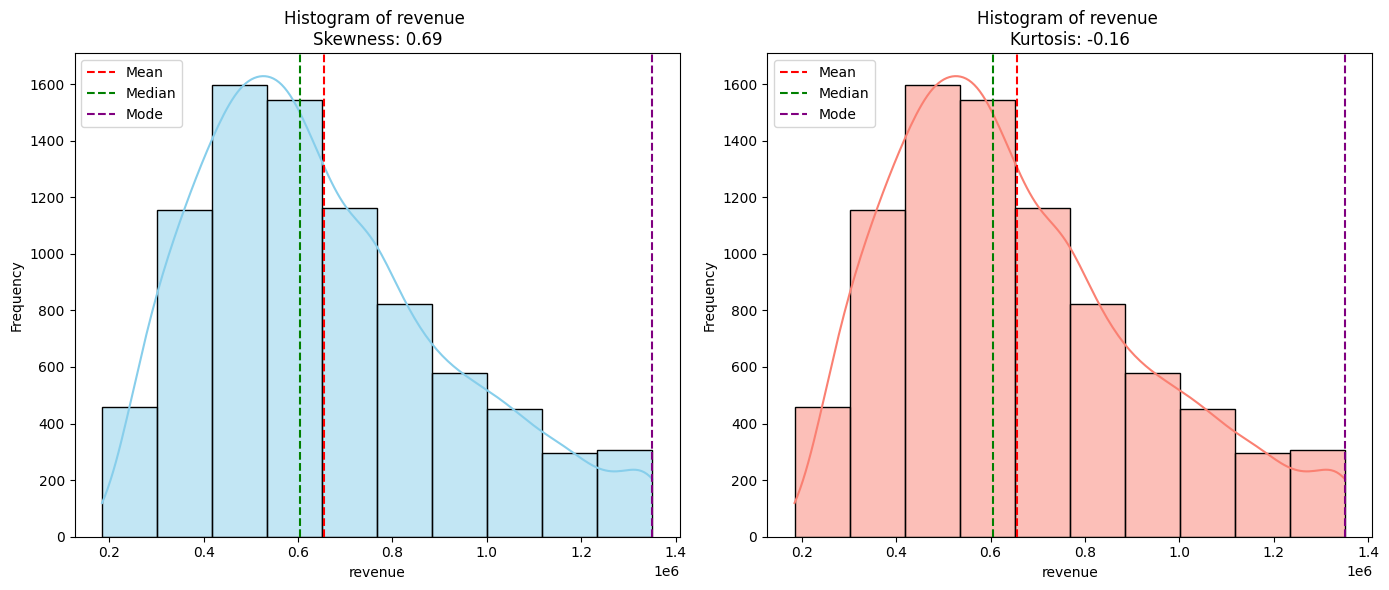

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(revenue_series, bins=10, kde=True, ax=axes[0], color='skyblue')
axes[0].axvline(mean, color='red', linestyle='--', label='Mean')
axes[0].axvline(median, color='green', linestyle='--', label='Median')
axes[0].axvline(mode, color='purple', linestyle='--', label='Mode')
axes[0].set_title(f'Histogram of revenue \nSkewness: {skewness:.2f}')
axes[0].set_xlabel('revenue')
axes[0].set_ylabel('Frequency')
axes[0].legend()

sns.histplot(revenue_series, bins=10, kde=True, ax=axes[1], color='salmon')
axes[1].axvline(mean, color='red', linestyle='--', label='Mean')
axes[1].axvline(median, color='green', linestyle='--', label='Median')
axes[1].axvline(mode, color='purple', linestyle='--', label='Mode')
axes[1].set_title(f'Histogram of revenue \nKurtosis: {kurtosis:.2f}')
axes[1].set_xlabel('revenue')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


## Normal Distribution

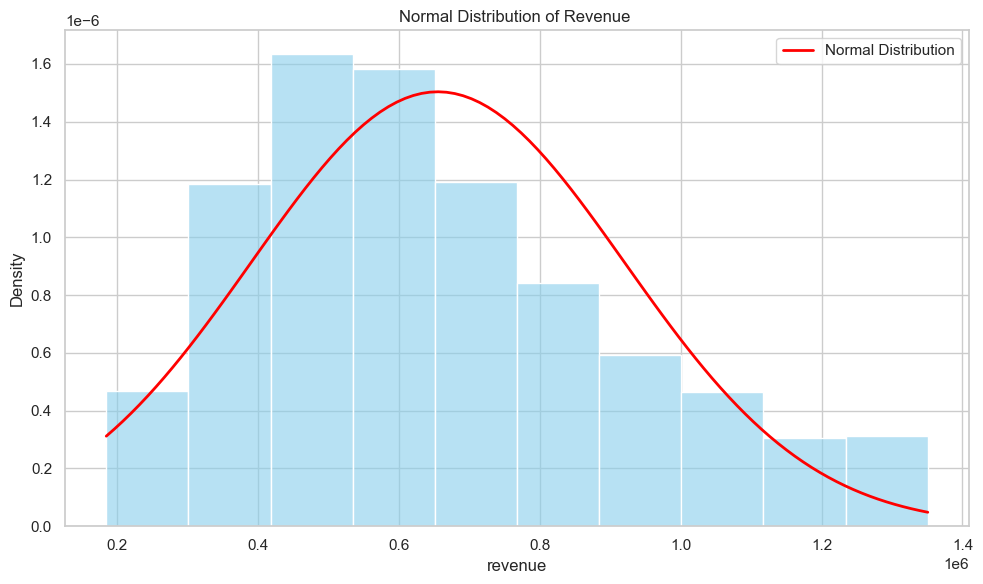

In [20]:
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(revenue_series, bins=10, kde=False, color='skyblue', stat="density", alpha=0.6)

# Generate the x values for the normal distribution curve
x = np.linspace(revenue_series.min(), revenue_series.max(), 100)
# Calculate the normal distribution curve
y = stats.norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve
plt.plot(x, y, color='red', label='Normal Distribution', linewidth=2)

# Add titles and labels
plt.title('Normal Distribution of Revenue ')
plt.xlabel('revenue')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Check lowest and Highest Revenue

In [21]:
# Lowest revenue
low_revenue = dataset['Revenue'].min()
print("Lowest Revenue Value:", low_revenue)

# Highest revenue
high_revenue = dataset['Revenue'].max()
print("Highest Revenue Value:", high_revenue)

Lowest Revenue Value: 184708.52
Highest Revenue Value: 1350758.47875


## Probability Density Function 

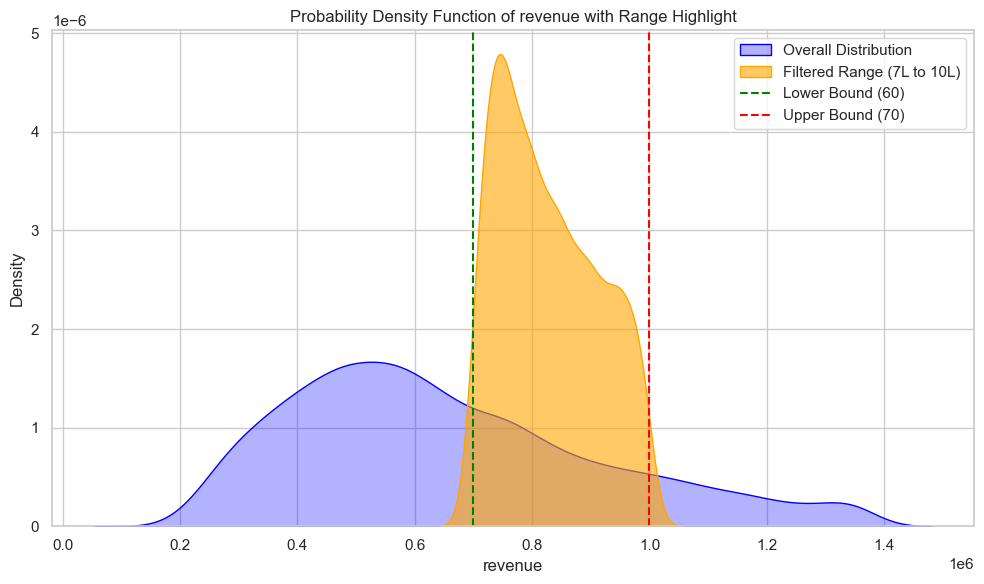

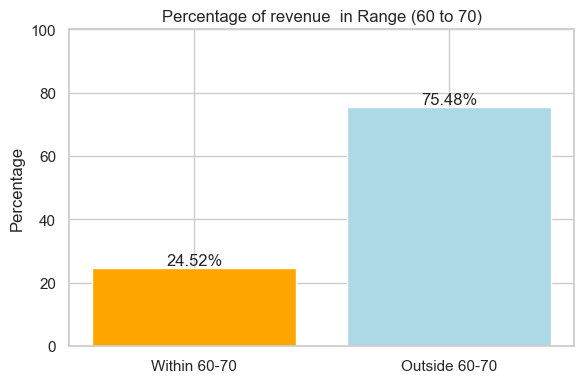

In [22]:
# Define the range for filtering
lower_bound = 700000
upper_bound = 1000000

# Calculate the percentage of values within the specified range
filtered_data = revenue_series[(revenue_series >= lower_bound) & (revenue_series <= upper_bound)]
percentage_in_range = (len(filtered_data) / len(revenue_series)) * 100

sns.set(style="whitegrid")

# Create the figure for KDE
plt.figure(figsize=(10, 6))

# Plot the KDE for the Probability Density Function in the specified range
sns.kdeplot(revenue_series, color='blue', fill=True, alpha=0.3, label='Overall Distribution')
sns.kdeplot(filtered_data, color='orange', fill=True, alpha=0.6, label='Filtered Range (7L to 10L)')

# Add vertical lines for the range
plt.axvline(lower_bound, color='green', linestyle='--', label='Lower Bound (60)')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound (70)')

# Add titles and labels
plt.title('Probability Density Function of revenue with Range Highlight')
plt.xlabel('revenue')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Create a bar plot for percentage representation
plt.figure(figsize=(6, 4))
plt.bar(['Within 60-70', 'Outside 60-70'], [percentage_in_range, 100 - percentage_in_range], color=['orange', 'lightblue'])
plt.title('Percentage of revenue  in Range (60 to 70)')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Show the percentage value on top of the bars
for index, value in enumerate([percentage_in_range, 100 - percentage_in_range]):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

# Show the bar plot
plt.tight_layout()
plt.show()

## Standard Normal Distribution

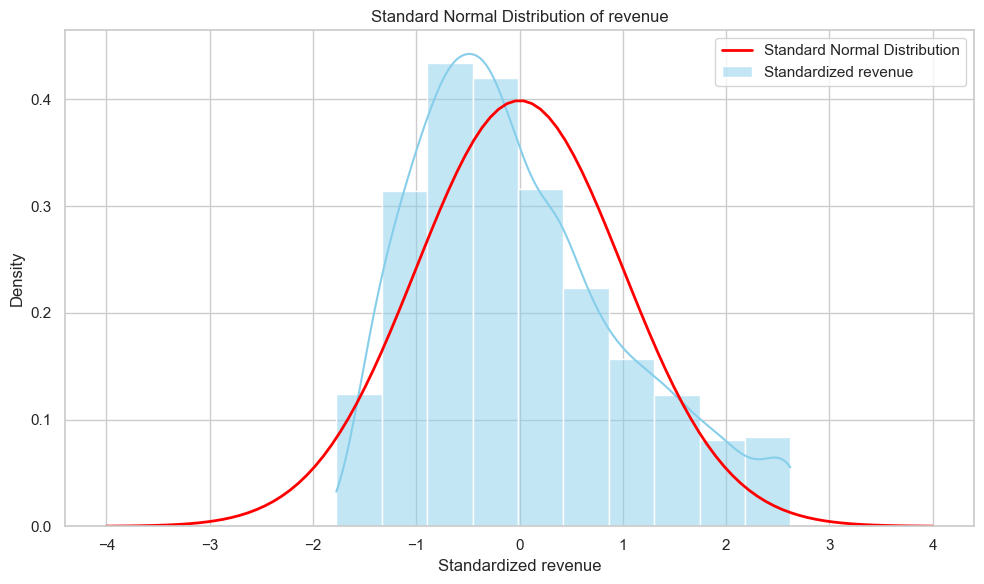

In [23]:
from scipy.stats import norm

mean = np.mean(revenue_series)
std_dev = np.std(revenue_series)

# Standardize the ssc_p ratings
standardized_data = (revenue_series - mean) / std_dev

# Create a range of values for plotting the standard normal distribution
x_values = np.linspace(-4, 4, 100)  # Range for the standard normal distribution
y_values = norm.pdf(x_values, 0, 1)  # PDF for standard normal distribution

# Set the style for the plots
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the standardized data's histogram
sns.histplot(standardized_data, bins=10, kde=True, color='skyblue', stat='density', label='Standardized revenue')

# Plot the standard normal distribution curve
plt.plot(x_values, y_values, color='red', label='Standard Normal Distribution', lw=2)

# Add titles and labels
plt.title('Standard Normal Distribution of revenue')
plt.xlabel('Standardized revenue')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

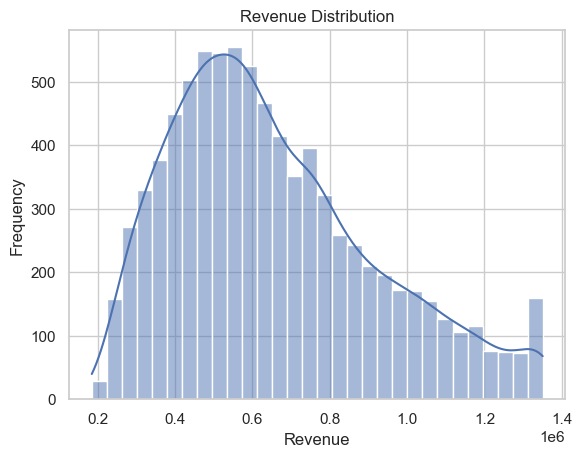

In [24]:
# Revenue distribution
sns.histplot(dataset['Revenue'], kde=True, bins=30)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

## Co-variance

In [25]:
dataset.cov(numeric_only=True)

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
Rating,0.338112,4.919244e-02,-1.888528e-02,2.505773e+02,2.861023e+03,0.071185,-0.683210,-0.053254,0.010631,0.001334,-3.188744e-03,1.984471e-02,1.483916e+03
Seating Capacity,0.049192,3.027422e+02,-7.186418e+00,1.528971e+04,1.527347e+05,0.990967,-77.654418,-40.926308,0.127357,-0.288015,1.524098e+02,1.457123e+02,3.130696e+06
Average Meal Price,-0.018885,-7.186418e+00,2.055429e+02,-1.131476e+02,-2.038709e+03,0.031686,7.160808,16.528948,-0.040389,0.434385,-5.188395e+00,-7.983463e+00,2.611842e+06
Marketing Budget,250.577304,1.528971e+04,-1.131476e+02,2.906027e+06,2.942605e+07,194.907905,-4521.260919,-3622.606882,39.157819,-0.650342,7.887599e+03,7.545643e+03,1.663270e+08
Social Media Followers,2861.023352,1.527347e+05,-2.038709e+03,2.942605e+07,3.062721e+08,2137.612504,-46754.382289,-31309.665928,365.068704,17.682250,7.838376e+04,7.497494e+04,1.654153e+09
Chef Experience Years,0.071185,9.909665e-01,3.168561e-02,1.949079e+02,2.137613e+03,30.432937,-11.791386,0.740633,-0.018293,-0.121395,-4.110352e-02,-9.736293e-01,3.960515e+04
Number of Reviews,-0.683210,-7.765442e+01,7.160808e+00,-4.521261e+03,-4.675438e+04,-11.791386,76848.226855,116.601761,7.272660,3.894734,4.328101e+00,-3.396946e+01,-6.524259e+05
Avg Review Length,-0.053254,-4.092631e+01,1.652895e+01,-3.622607e+03,-3.130967e+04,0.740633,116.601761,5183.720597,0.891384,1.645557,-2.053246e+01,-1.587160e+01,-2.180275e+05
Ambience Score,0.010631,1.273568e-01,-4.038950e-02,3.915782e+01,3.650687e+02,-0.018293,7.272660,0.891384,6.632903,0.004080,-6.295783e-01,-8.579069e-01,2.118127e+03
Service Quality Score,0.001334,-2.880151e-01,4.343849e-01,-6.503424e-01,1.768225e+01,-0.121395,3.894734,1.645557,0.004080,6.690252,-1.392966e-01,2.175366e-01,3.756796e+03


## Co-Relation

In [26]:
dataset.corr(numeric_only=True)

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
Rating,1.000000,0.004862,-0.002265,0.252791,0.281150,0.022192,-0.004238,-0.001272,0.007099,0.000887,-0.000274,0.001706,0.009619
Seating Capacity,0.004862,1.000000,-0.028809,0.515481,0.501588,0.010324,-0.016100,-0.032670,0.002842,-0.006400,0.437416,0.418636,0.678212
Average Meal Price,-0.002265,-0.028809,1.000000,-0.004630,-0.008126,0.000401,0.001802,0.016013,-0.001094,0.011714,-0.018072,-0.027837,0.686684
Marketing Budget,0.252791,0.515481,-0.004630,1.000000,0.986344,0.020726,-0.009567,-0.029516,0.008919,-0.000147,0.231054,0.221270,0.367768
Social Media Followers,0.281150,0.501588,-0.008126,0.986344,1.000000,0.022141,-0.009637,-0.024849,0.008100,0.000391,0.223661,0.214161,0.356273
Chef Experience Years,0.022192,0.010324,0.000401,0.020726,0.022141,1.000000,-0.007710,0.001865,-0.001288,-0.008508,-0.000372,-0.008823,0.027061
Number of Reviews,-0.004238,-0.016100,0.001802,-0.009567,-0.009637,-0.007710,1.000000,0.005842,0.010186,0.005432,0.000780,-0.006126,-0.008871
Avg Review Length,-0.001272,-0.032670,0.016013,-0.029516,-0.024849,0.001865,0.005842,1.000000,0.004807,0.008836,-0.014241,-0.011020,-0.011414
Ambience Score,0.007099,0.002842,-0.001094,0.008919,0.008100,-0.001288,0.010186,0.004807,1.000000,0.000612,-0.012207,-0.016652,0.003100
Service Quality Score,0.000887,-0.006400,0.011714,-0.000147,0.000391,-0.008508,0.005432,0.008836,0.000612,1.000000,-0.002689,0.004204,0.005475


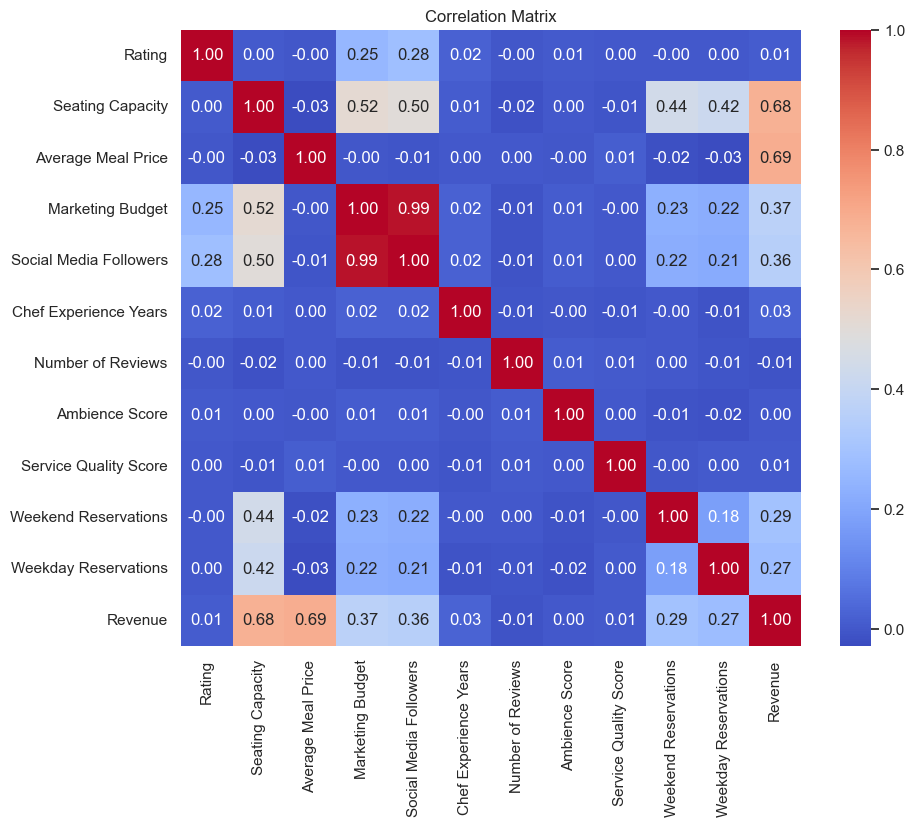

In [27]:
# Correlation heatmap for numerical columns
numerical_cols = ['Rating', 'Seating Capacity', 'Average Meal Price', 'Marketing Budget',
                  'Social Media Followers', 'Chef Experience Years', 'Number of Reviews',
                  'Ambience Score', 'Service Quality Score', 'Weekend Reservations',
                  'Weekday Reservations', 'Revenue']

corr_matrix = dataset[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


Location
Downtown    864339.357746
Suburban    647049.702747
Rural       450158.131676
Name: Revenue, dtype: float64


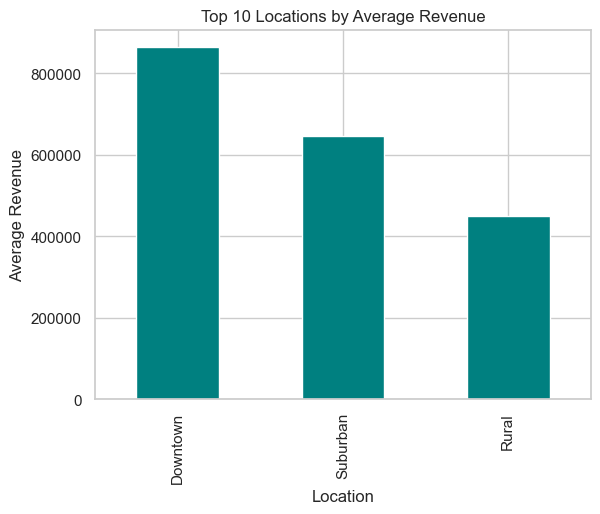

In [28]:
# Average revenue by location
location_revenue = dataset.groupby('Location')['Revenue'].mean().sort_values(ascending=False).head(10)
print(location_revenue)

# Plot
location_revenue.plot(kind='bar', color='teal')
plt.title('Top 10 Locations by Average Revenue')
plt.xlabel('Location')
plt.ylabel('Average Revenue')
plt.show()


Cuisine
French      1433
American    1416
Italian     1413
Mexican     1393
Indian      1369
Japanese    1344
Name: count, dtype: int64


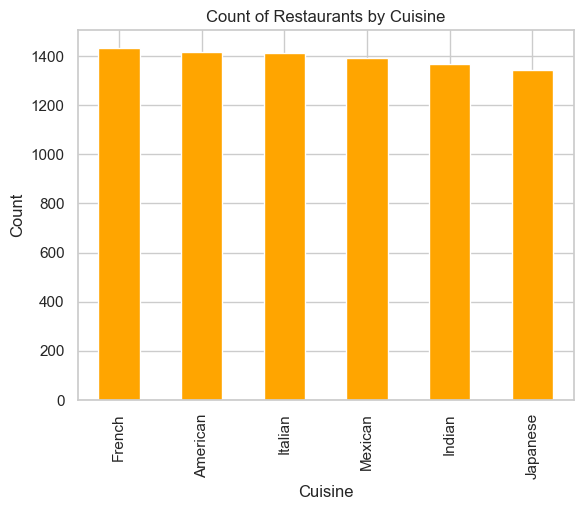

In [29]:
# Count of restaurants by cuisine
cuisine_count = dataset['Cuisine'].value_counts()
print(cuisine_count)

# Plot
cuisine_count.plot(kind='bar', color='orange')
plt.title('Count of Restaurants by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()


Location
Downtown    4.013364
Rural       4.012962
Suburban    3.998420
Name: Rating, dtype: float64


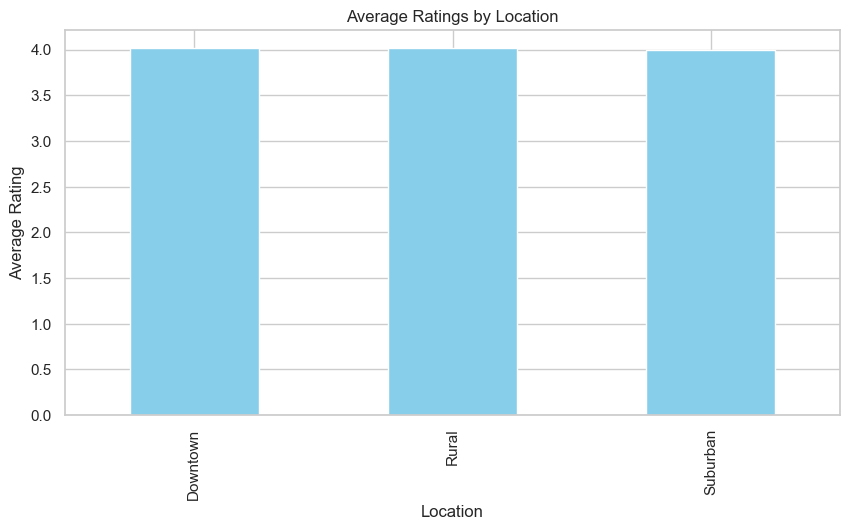

In [30]:
# Average rating by location
location_rating = dataset.groupby('Location')['Rating'].mean().sort_values(ascending=False)
print(location_rating)

# Plot
location_rating.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Average Ratings by Location')
plt.xlabel('Location')
plt.ylabel('Average Rating')
plt.show()


Cuisine
Japanese    933261.476252
French      820204.107132
Italian     692742.385796
American    564942.031518
Indian      496615.723944
Mexican     427383.895621
Name: Revenue, dtype: float64


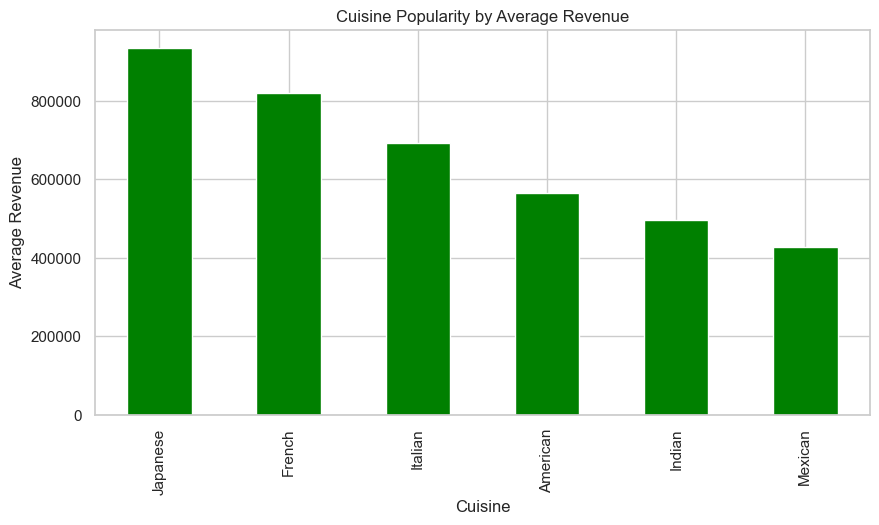

In [31]:
# Average revenue by cuisine
cuisine_revenue = dataset.groupby('Cuisine')['Revenue'].mean().sort_values(ascending=False)
print(cuisine_revenue)

# Plot
cuisine_revenue.plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Cuisine Popularity by Average Revenue')
plt.xlabel('Cuisine')
plt.ylabel('Average Revenue')
plt.show()


Average Weekend Revenue: 1407.3687153441683
Average Weekday Revenue: 1392.2907325525812


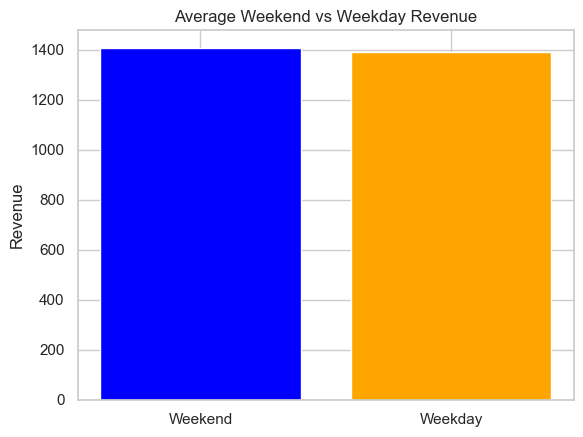

In [32]:
# Revenue ratio for weekend and weekday reservations
dataset['Weekend Revenue'] = dataset['Weekend Reservations'] * dataset['Average Meal Price']
dataset['Weekday Revenue'] = dataset['Weekday Reservations'] * dataset['Average Meal Price']

avg_weekend_revenue = dataset['Weekend Revenue'].mean()
avg_weekday_revenue = dataset['Weekday Revenue'].mean()

print("Average Weekend Revenue:", avg_weekend_revenue)
print("Average Weekday Revenue:", avg_weekday_revenue)

# Plot
plt.bar(['Weekend', 'Weekday'], [avg_weekend_revenue, avg_weekday_revenue], color=['blue', 'orange'])
plt.title('Average Weekend vs Weekday Revenue')
plt.ylabel('Revenue')
plt.show()
